In [64]:
# Declare used libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
# Load dataset
df = pd.read_csv("house_prices_dataset_cleaned.csv")
x_train = df["sqft (1000s)"].values
y_train = df["price (1000$)"].values

In [66]:
# Convert to TensorFlow dataset 
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)

In [80]:
# Initialize model with given parameters
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,), activation=None,
                          kernel_initializer=tf.keras.initializers.Constant(50.0),
                          bias_initializer=tf.keras.initializers.Constant(10.0))
])

# Compile model without optimizer, manually update par
model.compile(loss="mse")   

c:\Users\Lenovo\.conda\envs\dev2\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
# Initial parameters
w, b = model.layers[0].weights
print(w, b)

<Variable path=sequential_11/dense_11/kernel, shape=(1, 1), dtype=float32, value=[[3.1547875]]> <Variable path=sequential_11/dense_11/bias, shape=(1,), dtype=float32, value=[57.339924]>


In [82]:
# iterations and learning rate
epochs = 1000
learning_rate = 0.01

In [85]:
# Training model
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(x_train, training=True) #Predictions
        cost = 1/2 * tf.reduce_mean(tf.square(y_pred - y_train))  # MSE

    # Calculate gradient
    gradients = tape.gradient(cost, [w, b])

    # Update parameters
    w.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Cost = {cost.numpy():.4f}")

Epoch 0: Cost = 796.8082
Epoch 50: Cost = 793.7098
Epoch 100: Cost = 790.9473
Epoch 150: Cost = 788.4843
Epoch 200: Cost = 786.2884
Epoch 250: Cost = 784.3304
Epoch 300: Cost = 782.5848
Epoch 350: Cost = 781.0283
Epoch 400: Cost = 779.6407
Epoch 450: Cost = 778.4035
Epoch 500: Cost = 777.3004
Epoch 550: Cost = 776.3168
Epoch 600: Cost = 775.4399
Epoch 650: Cost = 774.6581
Epoch 700: Cost = 773.9611
Epoch 750: Cost = 773.3395
Epoch 800: Cost = 772.7855
Epoch 850: Cost = 772.2913
Epoch 900: Cost = 771.8509
Epoch 950: Cost = 771.4582


In [95]:
# Final parameters
w_final = w[0][0]
b_final = b[0]
print(f"w = {w_final:.4f}, b = {b_final:.4f}")

w = 3.1548, b = 57.3399


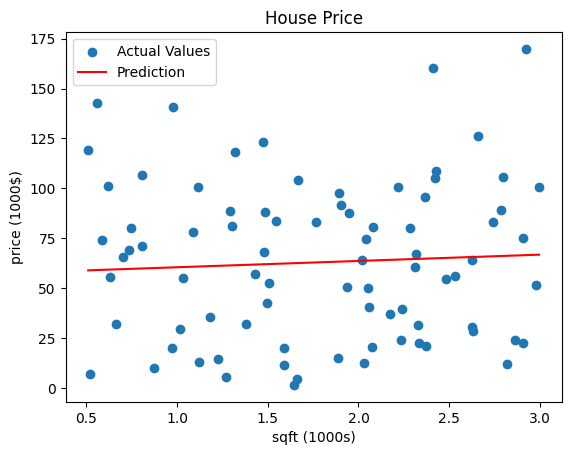

In [102]:
# Create the line
x_range = np.linspace(min(x_train), max(x_train), 100) 
y_pred = x_range * w_final + b_final  # y = x * w + b

# Plot the result
plt.scatter(x_train, y_train, label="Actual Values")  # True data
plt.plot(x_range, y_pred, color="red", label="Prediction") # Linear regression line
plt.xlabel("sqft (1000s)")
plt.ylabel("price (1000$)")
plt.legend()
plt.title("House Price")
plt.show()